In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import datetime
import time
import requests
import json
import dateutil.parser
import unicodedata
from dotenv import load_dotenv
from pytwitter import Api

In [2]:
# Load  ENV
load_dotenv()

# Set Alpaca API key and secret
# YOUR CODE HERE

twitter_api_key = os.getenv('twitter_api_key')
twitter_api_secret_key = os.getenv('twitter_api_secret_key')
bearer_token = Api(os.getenv('bearer_token'))

In [3]:
print(type(twitter_api_key))
print(type(twitter_api_secret_key))
print(type(bearer_token))

<class 'str'>
<class 'str'>
<class 'pytwitter.api.Api'>


In [4]:
from datetime import datetime

def convert_id_to_date(idd):
    shifted = int(idd) >> 22
    timestamp=shifted+1288834974657
    time_created = datetime.fromtimestamp(timestamp/1000).strftime('%Y-%m-%d %H:%M:%S')
    return time_created

In [5]:
tweet_response_ethereum = bearer_token.search_tweets(query='ethereum', max_results=100)

ethereum_tweet_data = tweet_response_ethereum.data

In [6]:
for tweet in ethereum_tweet_data:
    print(tweet.text)
    print(convert_id_to_date(tweet.id))

#Ethereum Burn Update 

Current Basefee:  22.9 Gwei

Avg Miner Tip:  1.38 Gwei

Total burnt $ETH:  2115464.44 ETH

Total burnt $ETHUSD:  $6,518,253,651

https://t.co/IjNPIjraWa
2022-04-14 20:51:48
@TheWeb3Finance Amazing and a great project 
#Clockx24 #UTK #Ethereum),
@Austin6077 
@MalikGCFR 
@JayRikh 
@
2022-04-14 20:51:48
RT @DehootValley: Hey Dehootians! 

🔥BIGGEST CROSSCHAIN COLLAB IS COMMING🔥 

24 projects are joining to bring the biggest giveaway on Wax,…
2022-04-14 20:51:48
$TRACE #TRACE #altcoinnews  #BTC #Ethereum   #nearNFTs  #NFTs  #NFTCommunity #Metaverse  #BUDDY https://t.co/y9TesjkcnO
2022-04-14 20:51:47
RT @JohnGh87: Grove is everywhere!
YAHOO FINANCE:
https://t.co/4JaJvAVZqt
https://t.co/irz8WhFdPk
#YahooFinance #Yahoo #NFTCommunity #Metav…
2022-04-14 20:51:46
RT @SatoshiOwl: 🔥 $VIRAL | @TheViralCrypto - SUPER EARLY GEM 💎

✅ only ~100k MC
✅ Liquidty ~90k 
✅ DApp is ready
🔥 Huge Marketing

Contract…
2022-04-14 20:51:46
RT @TekinogluDogu: Yüksek enflasyon beklentisinde pi

In [7]:
ethereum_df = pd.DataFrame(ethereum_tweet_data)
ethereum_df['id']=ethereum_df['id'].apply(lambda x: convert_id_to_date(x))
ethereum_df

,id,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,...,non_public_metrics,organic_metrics,possibly_sensitive,promoted_metrics,public_metrics,referenced_tweets,reply_settings,source,withheld,matching_rules
0,2022-04-14 20:51:48,#Ethereum Burn Update \n\nCurrent Basefee: 22...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2022-04-14 20:51:48,@TheWeb3Finance Amazing and a great project \n...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2022-04-14 20:51:48,RT @DehootValley: Hey Dehootians! \n\n🔥BIGGEST...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2022-04-14 20:51:47,$TRACE #TRACE #altcoinnews #BTC #Ethereum #...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2022-04-14 20:51:46,RT @JohnGh87: Grove is everywhere!\nYAHOO FINA...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-04-14 20:51:01,@VerfiedAirdrop Good project @naufal_bayanaka ...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,2022-04-14 20:50:59,RT @JacobsenStamp: 🔥AMAZING🔥\n\n #Terra has bo...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,2022-04-14 20:50:59,@ABC Look what I found! Salvator Mund collecti...,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,2022-04-14 20:50:58,"Name: Bancorp \nSupply: 50,000,000,000\nSymbol...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
ethereum_df_text = ethereum_df. drop(labels=['attachments','author_id','context_annotations','conversation_id','created_at','entities','geo','in_reply_to_user_id','non_public_metrics','organic_metrics','possibly_sensitive',
                                   'promoted_metrics', 'public_metrics', 'referenced_tweets', 'reply_settings', 'source', 'withheld', 'matching_rules','lang'],
                                   axis=1)
ethereum_df_text

,id,text
0,2022-04-14 20:51:48,#Ethereum Burn Update \n\nCurrent Basefee: 22...
1,2022-04-14 20:51:48,@TheWeb3Finance Amazing and a great project \n...
2,2022-04-14 20:51:48,RT @DehootValley: Hey Dehootians! \n\n🔥BIGGEST...
3,2022-04-14 20:51:47,$TRACE #TRACE #altcoinnews #BTC #Ethereum #...
4,2022-04-14 20:51:46,RT @JohnGh87: Grove is everywhere!\nYAHOO FINA...
...,...,...
95,2022-04-14 20:51:01,@VerfiedAirdrop Good project @naufal_bayanaka ...
96,2022-04-14 20:50:59,RT @JacobsenStamp: 🔥AMAZING🔥\n\n #Terra has bo...
97,2022-04-14 20:50:59,@ABC Look what I found! Salvator Mund collecti...
98,2022-04-14 20:50:58,"Name: Bancorp \nSupply: 50,000,000,000\nSymbol..."


In [23]:
""" DATA CLEANING AND ANALYSIS IMPORTS """

# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [24]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda text: cleaning_stopwords(text))

# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: cleaning_punctuations(x))

# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_repeating_char(x))

# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
ethereum_df_text['text'] = ethereum_df_text['text'].apply(lambda x: cleaning_URLs(x))


# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

ethereum_df_text = ethereum_df_text.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
ethereum_df_text.head(20)

,id,text
0,2022-04-14 20:51:48,Ethereum Burn Update Current Basefee 229 Gwei ...
1,2022-04-14 20:51:48,TheWeb3Finance Amazing great project Clockx24 ...
2,2022-04-14 20:51:48,RT DehootValley Hey Dehootians BIGGEST CROSSCH...
3,2022-04-14 20:51:47,TRACE TRACE altcoinnews BTC Ethereum nearNFTs ...
4,2022-04-14 20:51:46,RT JohnGh87 Grove everywhere YAHOO FINANCE htt...
5,2022-04-14 20:51:46,RT SatoshiOwl VIRAL TheViralCrypto SUPER EA...
6,2022-04-14 20:51:45,RT TekinogluDogu Yksek enflasyon beklentisinde...
7,2022-04-14 20:51:45,RT VispXofficial VispX Ecosystem Explained Del...
8,2022-04-14 20:51:45,TimBeiko Ethereum httpstco5FBEh8yoKT
9,2022-04-14 20:51:45,RT DailyAvax1 AVAX Giveaway Follow DailyAvax R...


In [26]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df_text.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df_text = ethereum_df_text.join(text_sentiment_df)

In [27]:
ethereum_df_text.head(50)

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-04-14 20:51:48,Ethereum Burn Update Current Basefee 229 Gwei ...,0.0000,0.000,1.000,0.000,0
1,2022-04-14 20:51:48,TheWeb3Finance Amazing great project Clockx24 ...,0.8360,0.497,0.503,0.000,1
2,2022-04-14 20:51:48,RT DehootValley Hey Dehootians BIGGEST CROSSCH...,0.0000,0.000,1.000,0.000,0
3,2022-04-14 20:51:47,TRACE TRACE altcoinnews BTC Ethereum nearNFTs ...,0.0000,0.000,1.000,0.000,0
4,2022-04-14 20:51:46,RT JohnGh87 Grove everywhere YAHOO FINANCE htt...,0.0000,0.000,1.000,0.000,0
5,2022-04-14 20:51:46,RT SatoshiOwl VIRAL TheViralCrypto SUPER EA...,0.8567,0.420,0.580,0.000,1
6,2022-04-14 20:51:45,RT TekinogluDogu Yksek enflasyon beklentisinde...,0.0000,0.000,1.000,0.000,0
7,2022-04-14 20:51:45,RT VispXofficial VispX Ecosystem Explained Del...,0.3818,0.167,0.833,0.000,1
8,2022-04-14 20:51:45,TimBeiko Ethereum httpstco5FBEh8yoKT,0.0000,0.000,1.000,0.000,0
9,2022-04-14 20:51:45,RT DailyAvax1 AVAX Giveaway Follow DailyAvax R...,0.4767,0.140,0.860,0.000,1


In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

In [29]:
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

In [30]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

ethereum_df_text['token_text'] = ethereum_df_text.text.apply(tokenizer)
ethereum_df_text

,id,text,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,2022-04-14 20:51:48,Ethereum Burn Update Current Basefee 229 Gwei ...,0.0000,0.000,1.000,0.0,0,"[Ethereum, Burn, Update, Current, Basefee, 229..."
1,2022-04-14 20:51:48,TheWeb3Finance Amazing great project Clockx24 ...,0.8360,0.497,0.503,0.0,1,"[TheWeb3Finance, Amazing, great, project, Cloc..."
2,2022-04-14 20:51:48,RT DehootValley Hey Dehootians BIGGEST CROSSCH...,0.0000,0.000,1.000,0.0,0,"[RT, DehootValley, Hey, Dehootians, BIGGEST, C..."
3,2022-04-14 20:51:47,TRACE TRACE altcoinnews BTC Ethereum nearNFTs ...,0.0000,0.000,1.000,0.0,0,"[TRACE, TRACE, altcoinnews, BTC, Ethereum, nea..."
4,2022-04-14 20:51:46,RT JohnGh87 Grove everywhere YAHOO FINANCE htt...,0.0000,0.000,1.000,0.0,0,"[RT, JohnGh87, Grove, everywhere, YAHOO, FINAN..."
...,...,...,...,...,...,...,...,...
95,2022-04-14 20:51:01,VerfiedAirdrop Good project naufalbayanaka fai...,0.4404,0.266,0.734,0.0,1,"[VerfiedAirdrop, Good, project, naufalbayanaka..."
96,2022-04-14 20:50:59,RT JacobsenStamp AMAZING Terra bought another1...,0.6739,0.274,0.726,0.0,1,"[RT, JacobsenStamp, AMAZING, Terra, bought, an..."
97,2022-04-14 20:50:59,ABC Look I found Salvator Mund collectible htt...,0.0000,0.000,1.000,0.0,0,"[ABC, Look, I, found, Salvator, Mund, collecti..."
98,2022-04-14 20:50:58,Name Bancorp Supply 50000000000 Symbol BAP RU...,0.0000,0.000,1.000,0.0,0,"[Name, Bancorp, Supply, 50000000000, Symbol, B..."


In [31]:
""" SAVE AS CSV FOR MORE ANALYSIS """

ethereum_df_text.to_csv("Results\generalpop_ethereum_sentiment_analysis_mostrecent2022.csv")

In [32]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
ethereum_df_text['text']= ethereum_df_text['text'].apply(lambda x: stemming_on_text(x))
ethereum_df_text['text'].head()

0    Ethereum Burn Update Current Basefee 229 Gwei ...
1    TheWeb3Finance Amazing great project Clockx24 ...
2    RT DehootValley Hey Dehootians BIGGEST CROSSCH...
3    TRACE TRACE altcoinnews BTC Ethereum nearNFTs ...
4    RT JohnGh87 Grove everywhere YAHOO FINANCE htt...
Name: text, dtype: object

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_bitcoin = ethereum_df_text['token_text']
token_text_df_bitcoin

0     [Ethereum, Burn, Update, Current, Basefee, 229...
1     [TheWeb3Finance, Amazing, great, project, Cloc...
2     [RT, DehootValley, Hey, Dehootians, BIGGEST, C...
3     [TRACE, TRACE, altcoinnews, BTC, Ethereum, nea...
4     [RT, JohnGh87, Grove, everywhere, YAHOO, FINAN...
                            ...                        
95    [VerfiedAirdrop, Good, project, naufalbayanaka...
96    [RT, JacobsenStamp, AMAZING, Terra, bought, an...
97    [ABC, Look, I, found, Salvator, Mund, collecti...
98    [Name, Bancorp, Supply, 50000000000, Symbol, B...
99    [We, know, btc, moon, crypto, binance, cryptoc...
Name: token_text, Length: 100, dtype: object

In [34]:
ethereum_df_text = ' '.join(str(e) for e in token_text_df_bitcoin)
ethereum_df_text

"['Ethereum', 'Burn', 'Update', 'Current', 'Basefee', '229', 'Gwei', 'Avg', 'Miner', 'Tip138', 'Gwei', 'Total', 'burnt', 'ETH', '1546444', 'ETH', 'Total', 'burnt', 'ETHUSD', '61825361', 'httpstcoIjNPIjraWa'] ['TheWeb3Finance', 'Amazing', 'great', 'project', 'Clockx24', 'UTK', 'Ethereum', 'Austin6077', 'MalikGCFR', 'JayRikh'] ['RT', 'DehootValley', 'Hey', 'Dehootians', 'BIGGEST', 'CROSSCHAIN', 'COLLAB', 'IS', 'COMMING', '24', 'project', 'joining', 'bring', 'biggest', 'giveaway', 'Wax'] ['TRACE', 'TRACE', 'altcoinnews', 'BTC', 'Ethereum', 'nearNFTs', 'NFTs', 'NFTCommunity', 'Metaverse', 'BUDDY', 'httpstcoy9TesjkcnO'] ['RT', 'JohnGh87', 'Grove', 'everywhere', 'YAHOO', 'FINANCE', 'httpstco4JaJvAVZqt', 'httpstcoirz8WhFdPk', 'YahooFinance', 'Yahoo', 'NFTCommunity', 'Metav'] ['RT', 'SatoshiOwl', 'VIRAL', 'TheViralCrypto', 'SUPER', 'EARLY', 'GEM', '100k', 'MC', 'Liquidty', '90k', 'DApp', 'ready', 'Huge', 'Marketing', 'Contract'] ['RT', 'TekinogluDogu', 'Yksek', 'enflasyon', 'beklentisinde', 'p

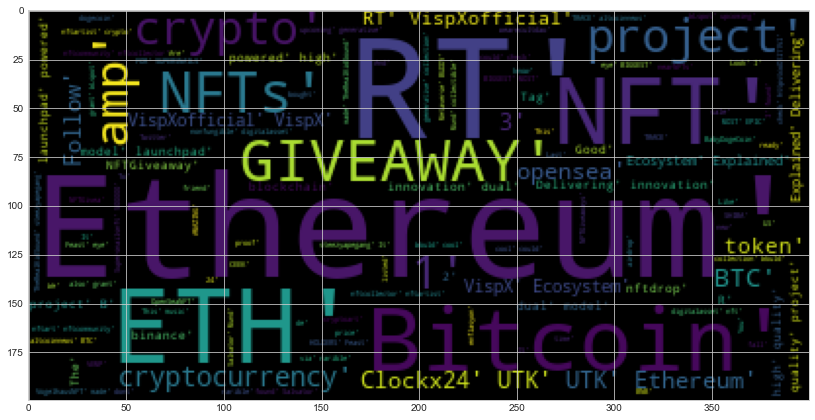

In [35]:
wc = WordCloud().generate(ethereum_df_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc)